In [1]:
#|default_exp app

In [7]:
!pip install timm

## Gradio Pets -try Rdjarbeng

In [8]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

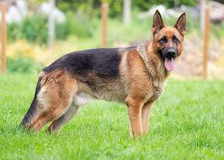

In [2]:
im = PILImage.create('dog.jpeg')
im.thumbnail((224,224))
im

In [9]:
from contextlib import contextmanager
import pathlib

@contextmanager
def set_posix_windows():
    posix_backup = pathlib.PosixPath
    try:
        pathlib.PosixPath = pathlib.WindowsPath
        yield
    finally:
        pathlib.PosixPath = posix_backup

EXPORT_PATH = pathlib.Path("model.pkl")

with set_posix_windows():
    learn = load_learner(EXPORT_PATH)

In [4]:
#for windows users
from pathlib import Path

# Ensure you're using Path, not PosixPath
model_path = Path('model.pkl')
learn = load_learner(model_path)

NotImplementedError: cannot instantiate 'PosixPath' on your system

In [3]:
#|export
learn = load_learner('model.pkl')

NotImplementedError: cannot instantiate 'PosixPath' on your system

In [10]:
learn.predict(im)

('shiba_inu',
 tensor(33),
 tensor([6.3936e-03, 3.2048e-03, 1.2916e-04, 4.3909e-04, 1.7997e-04, 4.4896e-05,
         4.3241e-03, 5.5350e-04, 2.0063e-04, 6.3684e-04, 2.6128e-03, 3.8972e-04,
         1.2791e-03, 2.1973e-02, 4.8422e-04, 4.0919e-04, 2.8233e-04, 2.3786e-02,
         2.4201e-03, 3.1371e-03, 8.8251e-03, 1.8994e-02, 2.6371e-03, 3.7404e-04,
         9.8885e-02, 3.3950e-01, 1.5954e-02, 3.7081e-04, 3.3307e-03, 8.0765e-04,
         3.7152e-04, 1.4447e-03, 1.6448e-03, 4.2526e-01, 1.2580e-03, 1.0812e-03,
         6.3783e-03]))

In [11]:
#|export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [12]:
classify_image(im)

{'Abyssinian': 0.0063936347141861916,
 'Bengal': 0.00320483953692019,
 'Birman': 0.00012916297418996692,
 'Bombay': 0.00043909461237490177,
 'British_Shorthair': 0.0001799702295102179,
 'Egyptian_Mau': 4.489603088586591e-05,
 'Maine_Coon': 0.00432412838563323,
 'Persian': 0.0005535031668841839,
 'Ragdoll': 0.0002006347494898364,
 'Russian_Blue': 0.0006368352915160358,
 'Siamese': 0.002612768206745386,
 'Sphynx': 0.00038971565663814545,
 'american_bulldog': 0.0012791263870894909,
 'american_pit_bull_terrier': 0.021972687914967537,
 'basset_hound': 0.00048422443796880543,
 'beagle': 0.0004091851587872952,
 'boxer': 0.00028232645126990974,
 'chihuahua': 0.023786406964063644,
 'english_cocker_spaniel': 0.002420125063508749,
 'english_setter': 0.0031371056102216244,
 'german_shorthaired': 0.00882511492818594,
 'great_pyrenees': 0.018993815407156944,
 'havanese': 0.002637104131281376,
 'japanese_chin': 0.00037404231261461973,
 'keeshond': 0.09888476133346558,
 'leonberger': 0.339500576257705

In [16]:
gr.__version__

'4.37.2'

In [13]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpeg']

AttributeError: module 'gradio' has no attribute 'inputs'

In [9]:
#|export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:3000/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x7f591050c970>,
 'http://127.0.0.1:3000/',
 None)

In [16]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (drop_path): Identity()
            )
            (1): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 

In [ ]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

In [26]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 2.2773e-02, -1.6051e-03,  4.0450e-02,  ...,  1.7370e-03,
          -4.5070e-02,  8.0949e-03],
         [-1.4383e-01,  1.6965e-02,  2.5983e-02,  ...,  1.2606e-02,
          -1.0443e-01,  5.6370e-02],
         [-6.5471e-02, -3.2719e-02,  5.6796e-03,  ..., -4.1571e-02,
           6.5921e-02, -4.0347e-02],
         ...,
         [-8.8080e-03,  6.9815e-02,  7.1424e-05,  ...,  4.0177e-03,
           4.1478e-02, -1.9052e-02],
         [ 2.0792e-03,  3.2267e-02,  2.9801e-02,  ..., -2.9897e-02,
          -3.0278e-02,  5.5432e-02],
         [ 1.2097e-01, -3.5444e-02, -4.6078e-03,  ..., -6.3829e-03,
           2.3691e-02, -1.1242e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.4047, -0.7418, -0.4235, -0.1650, -0.3028, -0.1898, -0.5534, -0.6271,
         -0.3008, -0.4254, -0.5997, -0.4107, -0.2172, -1.7935, -0.3170, -0.1163,
         -0.4482, -0.2846, -0.4342, -0.4945, -0.4065, -1.1402, -0.6754, -1.7237,
         -0.2955, -0.2654, -0.2187, -0.3914, 

## Export

In [19]:
import nbdev

nbdev.export.nb_export('app.ipynb','')
print('Export successful')

Export successful
